In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [122]:
df = pd.read_csv('../Data/insurance.csv')

In [123]:
# Afficher les premières lignes et les informations sur le dataset
print(df.head())
print(df.info())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [124]:
# Statistiques descriptives
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [125]:
# Convertir les colonnes en types appropriés
df['age'] = pd.to_numeric(df['age'])
df['bmi'] = pd.to_numeric(df['bmi'])
df['children'] = pd.to_numeric(df['children'])
df['charges'] = pd.to_numeric(df['charges'])

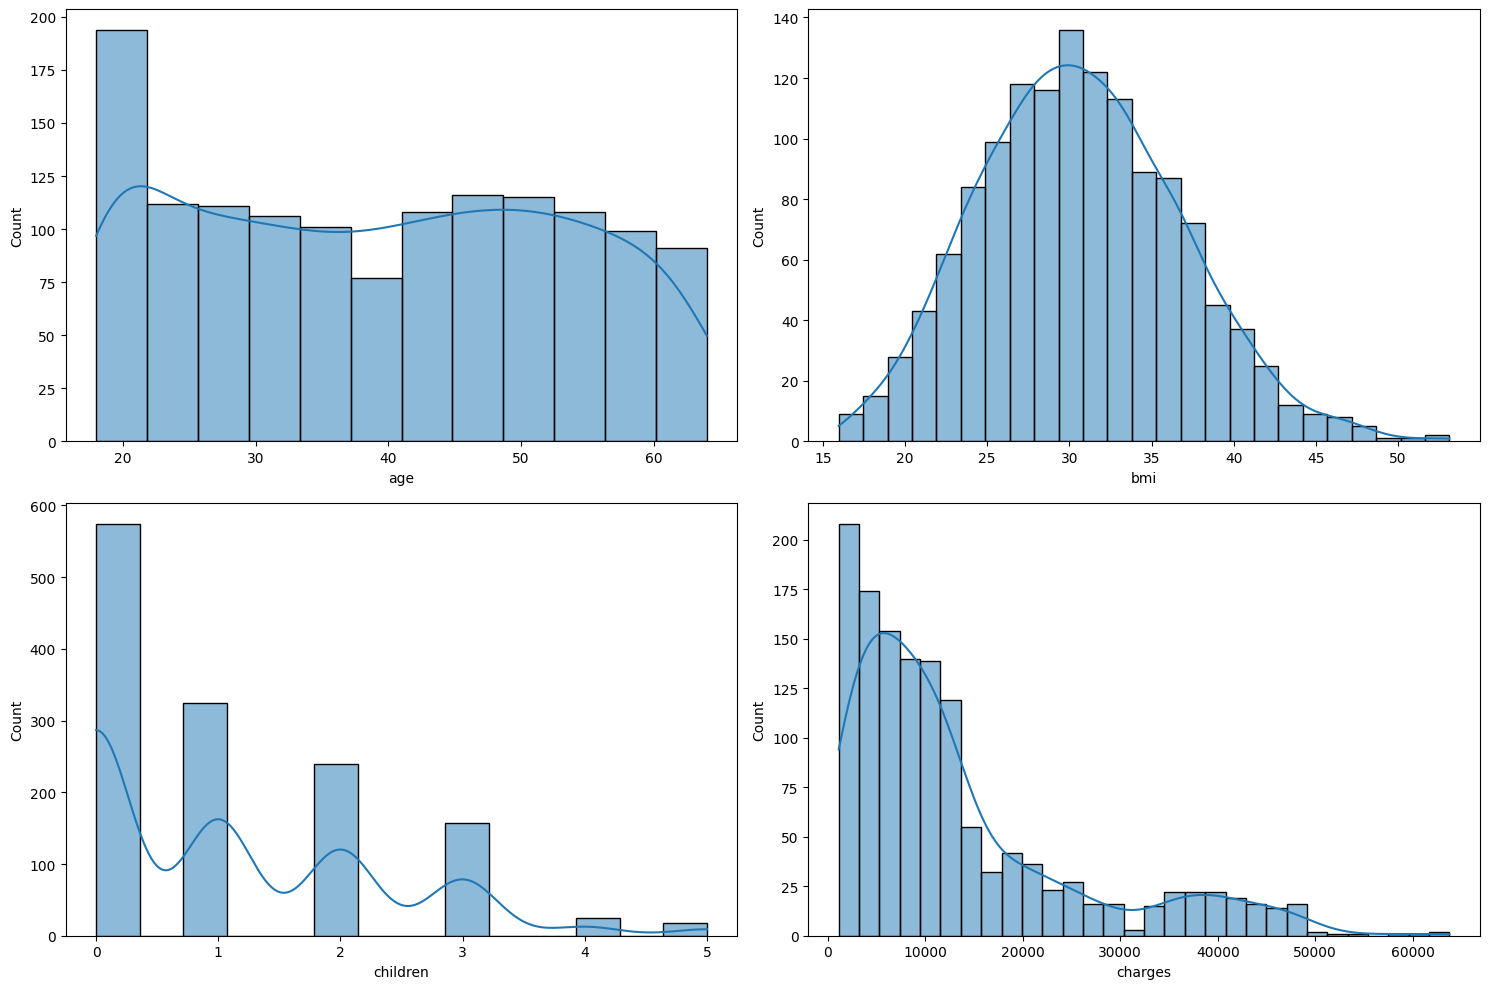

In [126]:
# Visualisation de la distribution des variables numériques
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(df['age'], kde=True, ax=axes[0, 0])
sns.histplot(df['bmi'], kde=True, ax=axes[0, 1])
sns.histplot(df['children'], kde=True, ax=axes[1, 0])
sns.histplot(df['charges'], kde=True, ax=axes[1, 1])
plt.tight_layout()
plt.show()

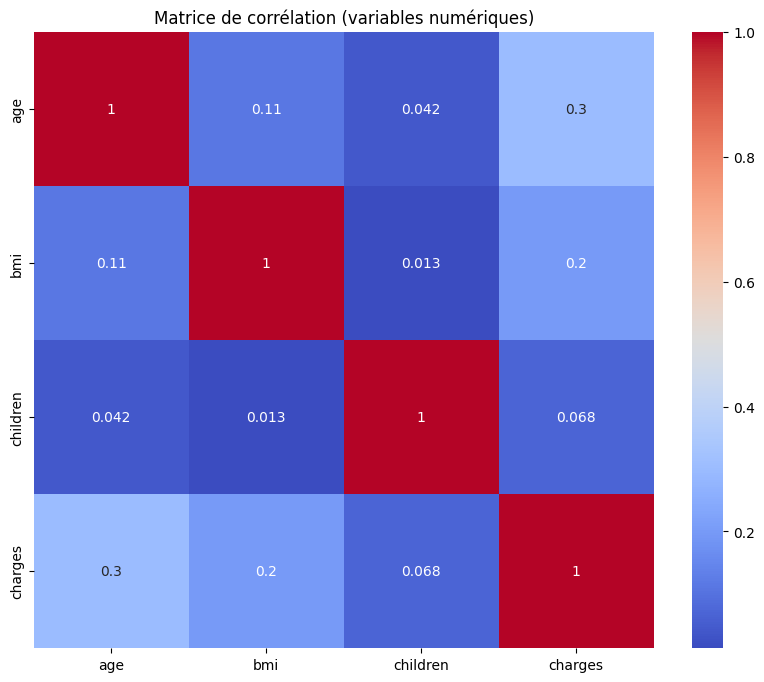

In [127]:
# Matrice de corrélation pour les variables numériques
numeric_columns = ['age', 'bmi', 'children', 'charges']
corr_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation (variables numériques)')
plt.show()

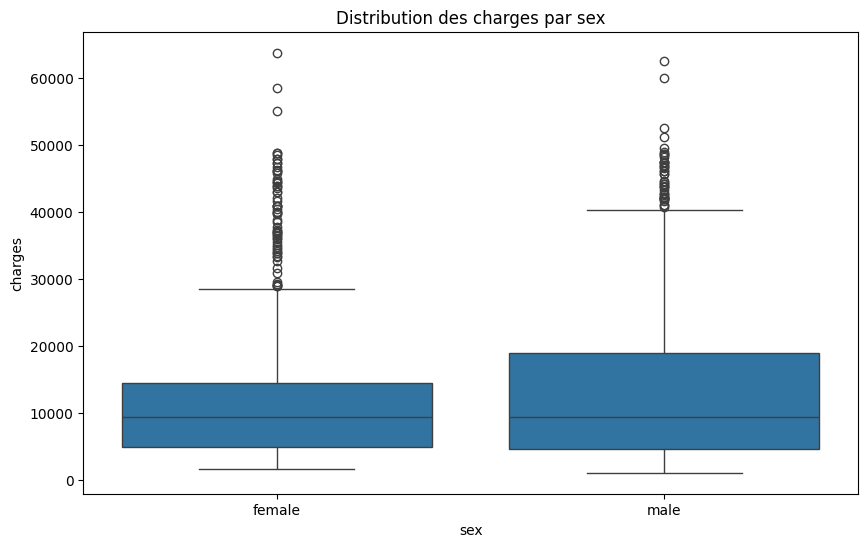

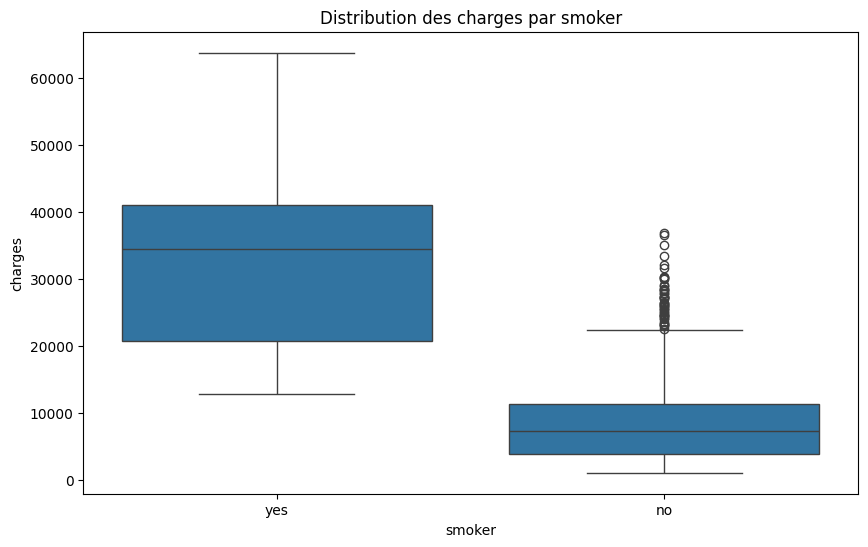

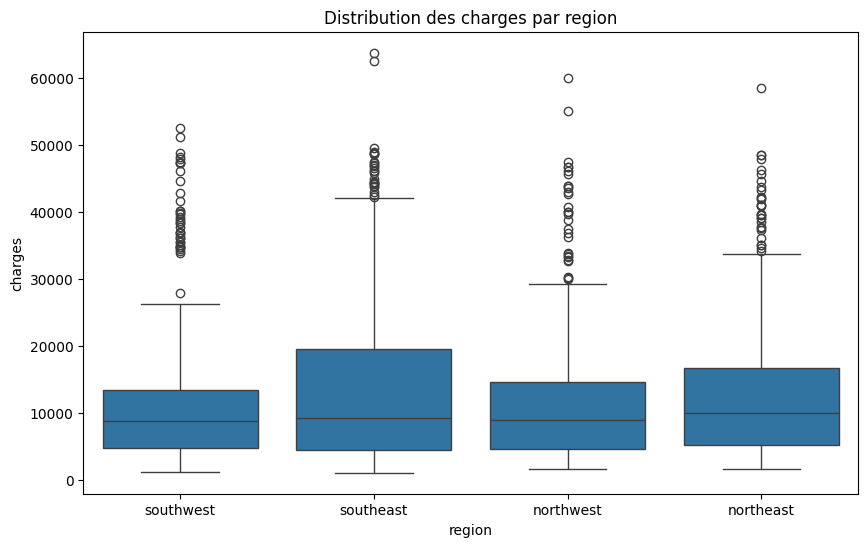

In [128]:
# Analyse des variables catégorielles
categorical_columns = ['sex', 'smoker', 'region']
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='charges', data=df)
    plt.title(f'Distribution des charges par {col}')
    plt.show()

In [129]:
selected_features = ['age', 'bmi', 'smoker']
print("Selected features:", selected_features)

Selected features: ['age', 'bmi', 'smoker']


In [130]:
X = df[selected_features]
y = df['charges']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'bmi']),
        ('cat', OneHotEncoder(drop='first'), ['smoker'])
    ])

In [131]:
X_preprocessed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [132]:
y_pred = model.predict(X_test)

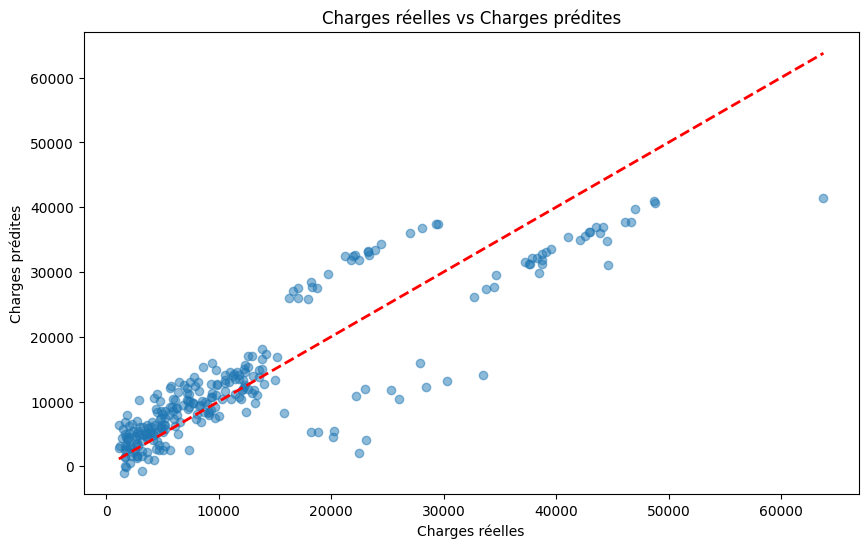

In [133]:
# Question 6: Visualiser le résultat de la régression sous forme d'un graphe
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Charges réelles')
plt.ylabel('Charges prédites')
plt.title('Charges réelles vs Charges prédites')
plt.show()

In [134]:
# Question 7: Évaluer le modèle

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("Métriques d'évaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Métriques d'évaluation:
Mean Squared Error (MSE): 34512843.88
Root Mean Squared Error (RMSE): 5874.76
Mean Absolute Error (MAE): 4260.56
